# Sentiment analysis on CellarTracker.com reviews

Preliminary sentiment analysis on amateur reviews. The sentiment by year was examined for some of the reviews. This notebook is just "scratch".

In [21]:
import pandas as pd
from textblob import TextBlob
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('dark')
sns.set_context('talk')
sns.set_style('white')

In [2]:
data = pd.read_pickle('../priv/pkl/03_cellartracker_dot_com_data.pkl')

In [9]:
data = data.loc[data.review_text.isnull().pipe(np.invert)]

In [23]:
data['review_points'] = data.review_points.astype(float)

In [10]:
data.head(2)

,review_points,review_text,review_time,review_userId,review_userName,wine_name,wine_variant,wine_wineId,wine_year
0,96,"Olive, horse sweat, dirty saddle, and smoke. T...",1160179200,1,Eric,1981 Chateau de Beaucastel Chateauneuf-du-Pape,Red Rhone Blend,18856,1981
1,93,A remarkably floral nose with violet and chamb...,1063929600,1,Eric,1995 Chateau Pichon-Longueville Baron,Red Bordeaux Blend,3495,1995


In [11]:
data['textblob'] = data.review_text.apply(lambda x: TextBlob(x))

In [24]:
data2 = data[:2000].copy()

In [25]:
data2['polarity'] = data2.textblob.apply(lambda x: x.sentiment.polarity)
data2['subjectivity'] = data2.textblob.apply(lambda x: x.sentiment.subjectivity)

In [26]:
data2.dtypes

review_points      float64
review_text         object
review_time         object
review_userId       object
review_userName     object
wine_name           object
wine_variant        object
wine_wineId         object
wine_year           object
textblob            object
polarity           float64
subjectivity       float64
dtype: object

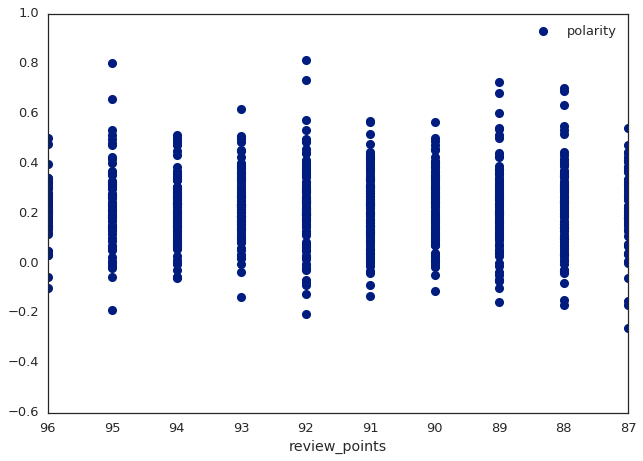

In [27]:
ax = data2.plot('review_points', 'polarity', marker='o',ls='')

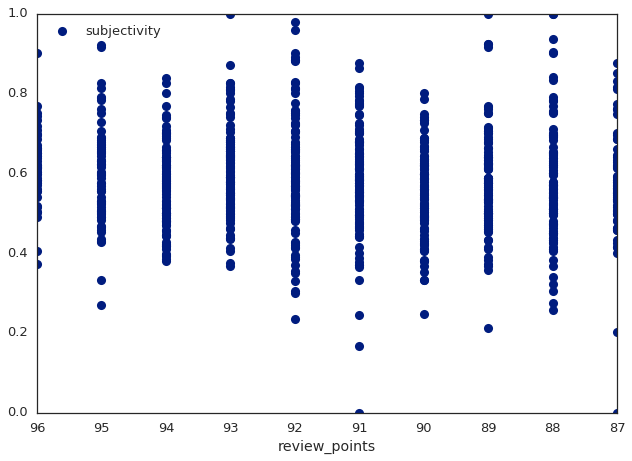

In [28]:
ax = data2.plot('review_points', 'subjectivity', marker='o',ls='')